# 1. Linear Regression

## 1 - 1. Linear Regression

In [ ]:
x = [1, 2, 3]
y = [1, 3, 2]

In [ ]:
x

[1, 2, 3]

In [ ]:
y

[1, 3, 2]

In [ ]:
sumx = 0
sumy = 0

for i in range(3):
    sumx += x[i]
    sumy += y[i]

mean_x = sumx / 3
mean_y = sumy / 3

print(mean_x, mean_y)

2.0 2.0


In [ ]:
sumxx = 0
sumxy = 0

for i in range(3):
    sumxy += (x[i] - mean_x) * (y[i] - mean_y)
    sumxx += (x[i] - mean_x) * (x[i] - mean_x)

beta = sumxy / sumxx
alpha = mean_y - beta * mean_x

print(alpha, beta)

1.0 0.5


In [ ]:
import numpy as np

x = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 3, 2])

temp1 = np.linalg.inv(np.dot(x.T, x))
temp2 = np.dot(x.T, y)

beta = np.dot(temp1, temp2)

print(beta)

[1.  0.5]


### Linear Regression by Gradient Descent algorithm

* 아래의 수식에서 w, b를 구하는 문제다. 
$$ Y_i = b + w \cdot x_i + \epsilon_i $$

* Gradient  Descent algorithm
$$ w = w - \lambda \frac {\partial} {\partial w} cost(w) $$

* cost function
$$ cost(b,w) = \sum (Y_i - b - w\cdot x_i)^2$$

* derivatives of cost function
$$ \frac {\partial} {\partial w} \sum (Y_i - b - w\cdot x_i)^2  =-\sum x_i y_i + b \sum x_i + w \sum x_i^2 $$

$$ \frac {\partial} {\partial b} \sum (Y_i - b - w\cdot x_i)^2  =-\sum y_i + nb + w \sum x_i $$

In [ ]:
import numpy as np

def deriv(w):
    partial_b = -np.sum(y) + 3 * w[0] + w[1] * np.sum(x)
    partial_w = -np.sum(x*y) + w[0] * np.sum(x) + w[1] * np.sum(x*x)
    return np.array([partial_b, partial_w])

x=np.array([1,2,3])
y=np.array([1,2,3])

w = np.array([0.5,0.5])   # Solution = [0, 1]

yhat =w[0] + w[1] * x

lamda = 0.1
for i in range(1000):
    w = w - lamda * deriv(w)
    if i % 100 == 0: print(w[0], w[1])

0.65 0.9
0.014776534847528352 0.9934997769589904
0.000375508029270005 0.9998348133734242
9.542580957027915e-06 0.9999958022022588
2.4250041064626826e-07 0.9999998933236531
6.162531068493365e-09 0.999999997289092
1.5660500090626665e-10 0.9999999999311092
3.979621904419414e-12 0.9999999999982493
1.0121319911487751e-13 0.9999999999999557
2.6253945281636192e-15 0.999999999999999


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
n = 100
a = np.linspace(-2, 2, n)
b = np.linspace(-1, 3, n)
a, b = np.meshgrid(a, b)

In [ ]:
a.shape, b.shape

((100, 100), (100, 100))

In [ ]:
xy = [[1,1],
      [2,2],
      [3,3]]

cost =np.zeros((100, 100))
for val in xy:
    temp = (val[1]- a - b*val[0])**2
    cost += temp

In [ ]:
cost.shape

(100, 100)

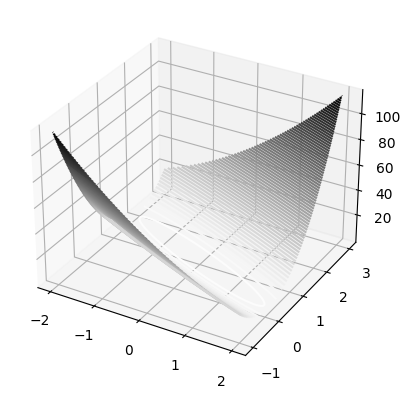

In [ ]:
ax = plt.axes(projection='3d')
ax.contour3D(a, b, cost, 100, cmap='binary')


## 1 - 2. Logistic Regression 

In [ ]:
import numpy as np

def sig(x):
    return 1/(1+np.exp(-x))

def deriv(x, y, w, b):
    sum1 = 0
    sum2 = 0
    n = y.shape[0]
    for i in range(n):
        _tmp = y[i] - sig(w*x[i]+b)
        sum1 += _tmp
        sum2 += _tmp * x[i]
    return -sum1, -sum2

In [ ]:
x = np.array([1,2,3,4,5,6])
y = np.array([0,0,0,1,1,1])
z = (x - np.min(x))/(np.max(x)-np.min(x))
lamda = 0.1
b = 1
w = 1

for i in range(2000):
    b = b - lamda * deriv(z, y, w, b)[0]
    w = w - lamda * deriv(z, y, w, b)[1]
    if i % 100 == 0: print(b,w)

0.8127268351101077 0.9935736653960819
-2.1108212377852165 4.478119928388738
-3.0832111511590683 6.371334638905858
-3.745148958399889 7.6693930821335865
-4.259875721896925 8.682698706223116
-4.687764296227815 9.527213629597501
-5.057859402121625 10.25901518168322
-5.386421176577151 10.909607017415594
-5.683502775244883 11.49851849989315
-5.955772858920762 12.038731895178797
-6.207893934159629 12.539340214871158
-6.44326190084875 13.006976485085097
-6.664432415543186 13.44663928156789
-6.873381053602277 13.862197262119395
-7.071669536424331 14.25671197741043
-7.260556068201113 14.632652406231408
-7.441070965226797 14.9920421686842
-7.614069938195663 15.336563344357053
-7.78027253262206 15.667631440282584
-7.940290443112651 15.986450657077903


In [ ]:
for i in range(6):
    _tmp = sig(b + w*z[i])
    if _tmp < 0.5: 
        y = 0
    else:
        y = 1

    print(z[i], y)

0.0 0
0.2 0
0.4 0
0.6 1
0.8 1
1.0 1


## 1 - 3. Linear Regression_TF2

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x = np.array([1,2,3])
y = np.array([1,2,3])


In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_dim=1))
sgd = tf.keras.optimizers.SGD(0.1)
model.compile(optimizer=sgd,loss='mse') # mse: mean squared error

In [ ]:
model.fit(x, y, epochs=1000, verbose = 0)

In [ ]:
model.get_weights()

[array([[1.]], dtype=float32), array([5.8448933e-08], dtype=float32)]

In [ ]:
predicted = model.predict(x)


1/1 [==============================] - 0s 142ms/step


In [ ]:
predicted

array([[1.],
       [2.],
       [3.]], dtype=float32)

## 1 - 4. Logistic Regression_TF2

In [ ]:
import tensorflow as tf
import numpy as np

x=np.array([[1],[2],[3],[4],[5],[6]])
y = np.array([[0],[0],[0],[1],[1],[1]])

In [ ]:
from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_dim=1))
model.compile(optimizer=tf.keras.optimizers.SGD(0.1),loss='binary_crossentropy')

In [ ]:
model.fit(x, y, epochs=5000, verbose = 0)
predicted = model.predict(x)
print(predicted)

1/1 [==============================] - 0s 97ms/step
[[3.7960106e-04]
 [9.4147418e-03]
 [1.9216111e-01]
 [8.5618544e-01]
 [9.9333340e-01]
 [9.9973190e-01]]


In [ ]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print(weights, biases)

[[3.2199907]] [-11.096001]


## 1 - 5. convexity

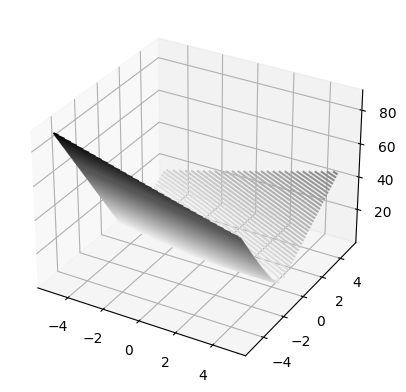

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sig(x):
    return 1/(1+np.exp(-x))

x = np.array([1,2,3,4,5,6])
t = np.array([0,0,0,1,1,1])
xt = np.array([[1,0],[2,0],[3,0],[4,1],[5,1],[6,1]])

n = 100
b = np.linspace(-5, 5, n)
w = np.linspace(-5, 5, n)
b, w = np.meshgrid(b, w)
cost1 = np.zeros((n, n)) # cross entropy function
for val in xt:
    temp = -val[1] * np.log(sig(b+w*val[0])) - (1-val[1]) * np.log(1-sig(b+w*val[0]))
    cost1 += temp

cost2 = np.zeros((n, n))
for val in xt:
    temp = (val[1]-sig(b+w*val[0]))**2 # error sums of squre function
    cost2 += temp

ax = plt.axes(projection='3d')
ax.contour3D(b, w, cost1, 100, cmap='binary') # satisfies convexity, 

# 2. MNIST Data

## 2 - 1. MNIST Data

In [ ]:
# MnistData.ipynb

import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets

mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print(train_x.shape)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


(28, 28)


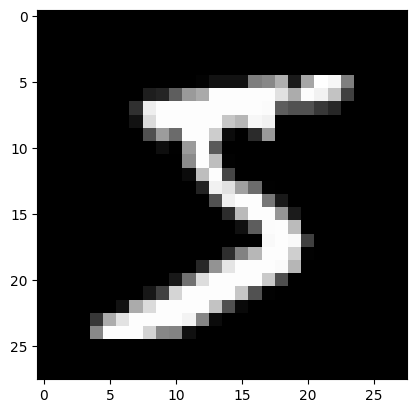

In [ ]:
image = train_x[0]
print(image.shape)
import matplotlib.pyplot as plt
plt.imshow(image, 'gray')
plt.show()


In [ ]:
print(train_y.shape)
print(train_y[0])
label = train_y[0]
print(label)
from tensorflow.keras.utils import to_categorical # one hot encoding
print(to_categorical(label, 10) )


(60000,)
5
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2 - 2. MNIST softmax_TF2

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
print(train_x.shape)
np.max(train_x[0]), np.min(train_x[0])

(60000, 28, 28)


(255, 0)

In [ ]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_x = train_x.reshape(-1,784) 
test_x = test_x.reshape(-1,784) 


In [ ]:
train_x.shape, test_x.shape

((60000, 784), (10000, 784))

In [ ]:
train_x = train_x / 255 # 표준화
test_x = test_x / 255

In [ ]:
train_x[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
np.min(train_x[0]), np.max(train_x[0])

(0.0, 1.0)

In [ ]:
print(train_y[0])

5


In [ ]:
train_y_onehot = to_categorical(train_y) # one hot encoding
test_y_onehot = to_categorical(test_y)
train_y_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(10, activation='softmax', input_dim=784))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y_onehot, validation_data=(test_x, test_y_onehot), batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 1.1700 - accuracy: 0.7314 - val_loss: 0.7234 - val_accuracy: 0.8500
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 0.6456 - accuracy: 0.8533 - val_loss: 0.5521 - val_accuracy: 0.8720
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 0.5379 - accuracy: 0.8673 - val_loss: 0.4842 - val_accuracy: 0.8839
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 0.4864 - accuracy: 0.8756 - val_loss: 0.4462 - val_accuracy: 0.8884
Epoch 5/5
600/600 [==============================] - 1s 2ms/step - loss: 0.4548 - accuracy: 0.8816 - val_loss: 0.4210 - val_accuracy: 0.8918


In [ ]:
model.evaluate(train_x, train_y_onehot)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8842


[0.4421650171279907, 0.8841666579246521]

In [ ]:
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 2ms/step - loss: 0.4211 - accuracy: 0.8912


[0.4211061894893646, 0.8912000060081482]

In [ ]:
predicted = model.predict(test_x)

In [ ]:
predicted[0], test_y_onehot[0]

(array([9.9963066e-04, 3.1817297e-05, 7.3262327e-04, 3.4996930e-03,
        8.4053725e-04, 4.7689257e-04, 3.9652517e-05, 9.7920108e-01,
        7.2067644e-04, 1.3457506e-02], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [ ]:
answer = []

In [ ]:
x = 0 * (-0.16) + 0 * 0.44 + 1 * (-0.99)
x

-0.99

In [ ]:
answer1 = sig(x)
print(answer1)
answer.append(answer1)

0.27091207765069353


In [ ]:
x = 0 * (-0.16) + 1 * 0.44 + 1 * (-0.99)
x

-0.55

In [ ]:
answer2 = sig(x)
print(answer2)
answer.append(answer2)

0.36586440898919936


In [ ]:
x = 1 * (-0.16) + 0 * 0.44 + 1 * (-0.99)
x

-1.15

In [ ]:
answer3 = sig(x)
print(answer3)
answer.append(answer3)

0.24048908305088898


In [ ]:
x = 1 * (-0.16) + 1 * 0.44 + 1 * (-0.99)
x

-0.71

In [ ]:
answer4 = sig(x)
print(answer4)
answer.append(answer4)

0.3295988401911314


In [ ]:
for i in range(4):
    if answer[i] < 0.5:
        print(f'answer{i} = 0')
    else:
        print(f'answer{i} = 1')

answer0 = 0
answer1 = 0
answer2 = 0
answer3 = 0


# 3. perceptron

In [ ]:
def f(x):
    if x > 0:
        return 1
    else:
        return 0

import numpy as np
x = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
t = np.array([0,0,0,1]) # AND
#t = np.array([0,1,1,1]) # OR
eta = 0.1
w = np.array([0.,0.,0.])

for iter in range(10):
    for i in range(len(x)): # 4가지 경우에 대해 루프
        fnet = f(np.dot(x[i], w)) 
        e = t[i] - fnet
        w[0] = w[0] + eta * e * x[i][0]
        w[1] = w[1] + eta * e * x[i][1]
        w[2] = w[2] + eta * e * x[i][2]
    print(w)


[0.1 0.1 0.1]
[0.  0.2 0.1]
[-0.1  0.2  0.1]
[-0.1  0.2  0.2]
[-0.2  0.2  0.1]
[-0.2  0.2  0.1]
[-0.2  0.2  0.1]
[-0.2  0.2  0.1]
[-0.2  0.2  0.1]
[-0.2  0.2  0.1]


In [ ]:
for i in range(len(x)):
    fnet = f(np.dot(x[i], w))
    print(fnet)

0
0
0
1


# XOR

In [ ]:
import numpy as np

def Sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])

w1=np.array([[-2,  5,  4],
            [ 3,  6,  3]])
b1=np.array([ 2, -2, -5])
b2 = np.array([0])

w2=np.array([[-4],
            [ 8],
            [-8]])

h=Sigmoid(np.dot(x,w1)+b1)
y=Sigmoid(np.dot(h,w2)+b2)

print (h)
print (y)

[[0.88079708 0.11920292 0.00669285]
 [0.99330715 0.98201379 0.11920292]
 [0.5        0.95257413 0.26894142]
 [0.95257413 0.99987661 0.88079708]]
[[0.06766597]
 [0.94927397]
 [0.96979454]
 [0.0542867 ]]
